## Methodology for the crime data

In [1]:
import numpy as np  # useful for many scientific computing in Python
import pandas as pd # primary data structure library

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from matplotlib.pyplot import figure
import matplotlib.ticker as ticker

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 150

Download the data from my Github

In [3]:
path7 = 'https://raw.githubusercontent.com/victor-onofre/Capstone-Project/master/Crime%20data/NEIGHBORHOOD_Violente_Crimes_coordinates_Tijuana_2014_to_2019.csv'

In [4]:
df_Violence = pd.read_csv(path7)

In [5]:
df_Violence.head()

,CRIME_CLASSIFICATION,NEIGHBORHOOD_OF_THE_CRIME,DATE OF RECORD OF THE CRIME,TIME OF THE CRIME,MUNICIPIO,DATE OF THE CRIME,day_of_week,year,month,day,Hour,counts,ADDRESS,location,latitude,longitude
0,THEFT WITH VIOLENCE(IN PUBLIC AREAS),3 DE OCTUBRE,01/01/19,02:39,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0,195.0,"3 DE OCTUBRE,Tijuana,Mexico","3 de Octubre, El Porvenir, Tijuana, Municipio ...",32.460409,-116.947183
1,HOMICIDE(VIOLENT),SANCHEZ TABOADA,01/01/19,01:25,TIJUANA,2019-01-01,Tuesday,2019,1,1,1.0,376.0,"SANCHEZ TABOADA,Tijuana,Mexico","Del. Sanchez Taboada, La Joya, Municipio de Ti...",32.458767,-117.003325
2,HOMICIDE(VIOLENT),3 DE OCTUBRE,06/01/19,20:41,TIJUANA,2019-05-01,Wednesday,2019,5,1,20.0,195.0,"3 DE OCTUBRE,Tijuana,Mexico","3 de Octubre, El Porvenir, Tijuana, Municipio ...",32.460409,-116.947183
3,THEFT WITH VIOLENCE(IN PUBLIC AREAS),RIO TIJUANA TERCERA ETAPA,02/01/19,21:05,TIJUANA,2019-02-01,Friday,2019,2,1,21.0,471.0,"RIO TIJUANA TERCERA ETAPA,Tijuana,Mexico",NaN,32.506700,-116.941100
4,THEFT WITH VIOLENCE TO A BUSINESS,RIO TIJUANA TERCERA ETAPA,05/01/19,17:55,TIJUANA,2019-05-01,Wednesday,2019,5,1,17.0,471.0,"RIO TIJUANA TERCERA ETAPA,Tijuana,Mexico",NaN,32.506700,-116.941100


In [6]:
df_Violence.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23339 entries, 0 to 23338
Data columns (total 16 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   CRIME_CLASSIFICATION         23339 non-null  object 
 1   NEIGHBORHOOD_OF_THE_CRIME    23339 non-null  object 
 2   DATE OF RECORD OF THE CRIME  23339 non-null  object 
 3   TIME OF THE CRIME            23339 non-null  object 
 4   MUNICIPIO                    23339 non-null  object 
 5   DATE OF THE CRIME            23339 non-null  object 
 6   day_of_week                  23339 non-null  object 
 7   year                         23339 non-null  int64  
 8   month                        23339 non-null  int64  
 9   day                          23339 non-null  int64  
 10  Hour                         23339 non-null  float64
 11  counts                       23339 non-null  float64
 12  ADDRESS                      23339 non-null  object 
 13  location        

## Histograms of violence

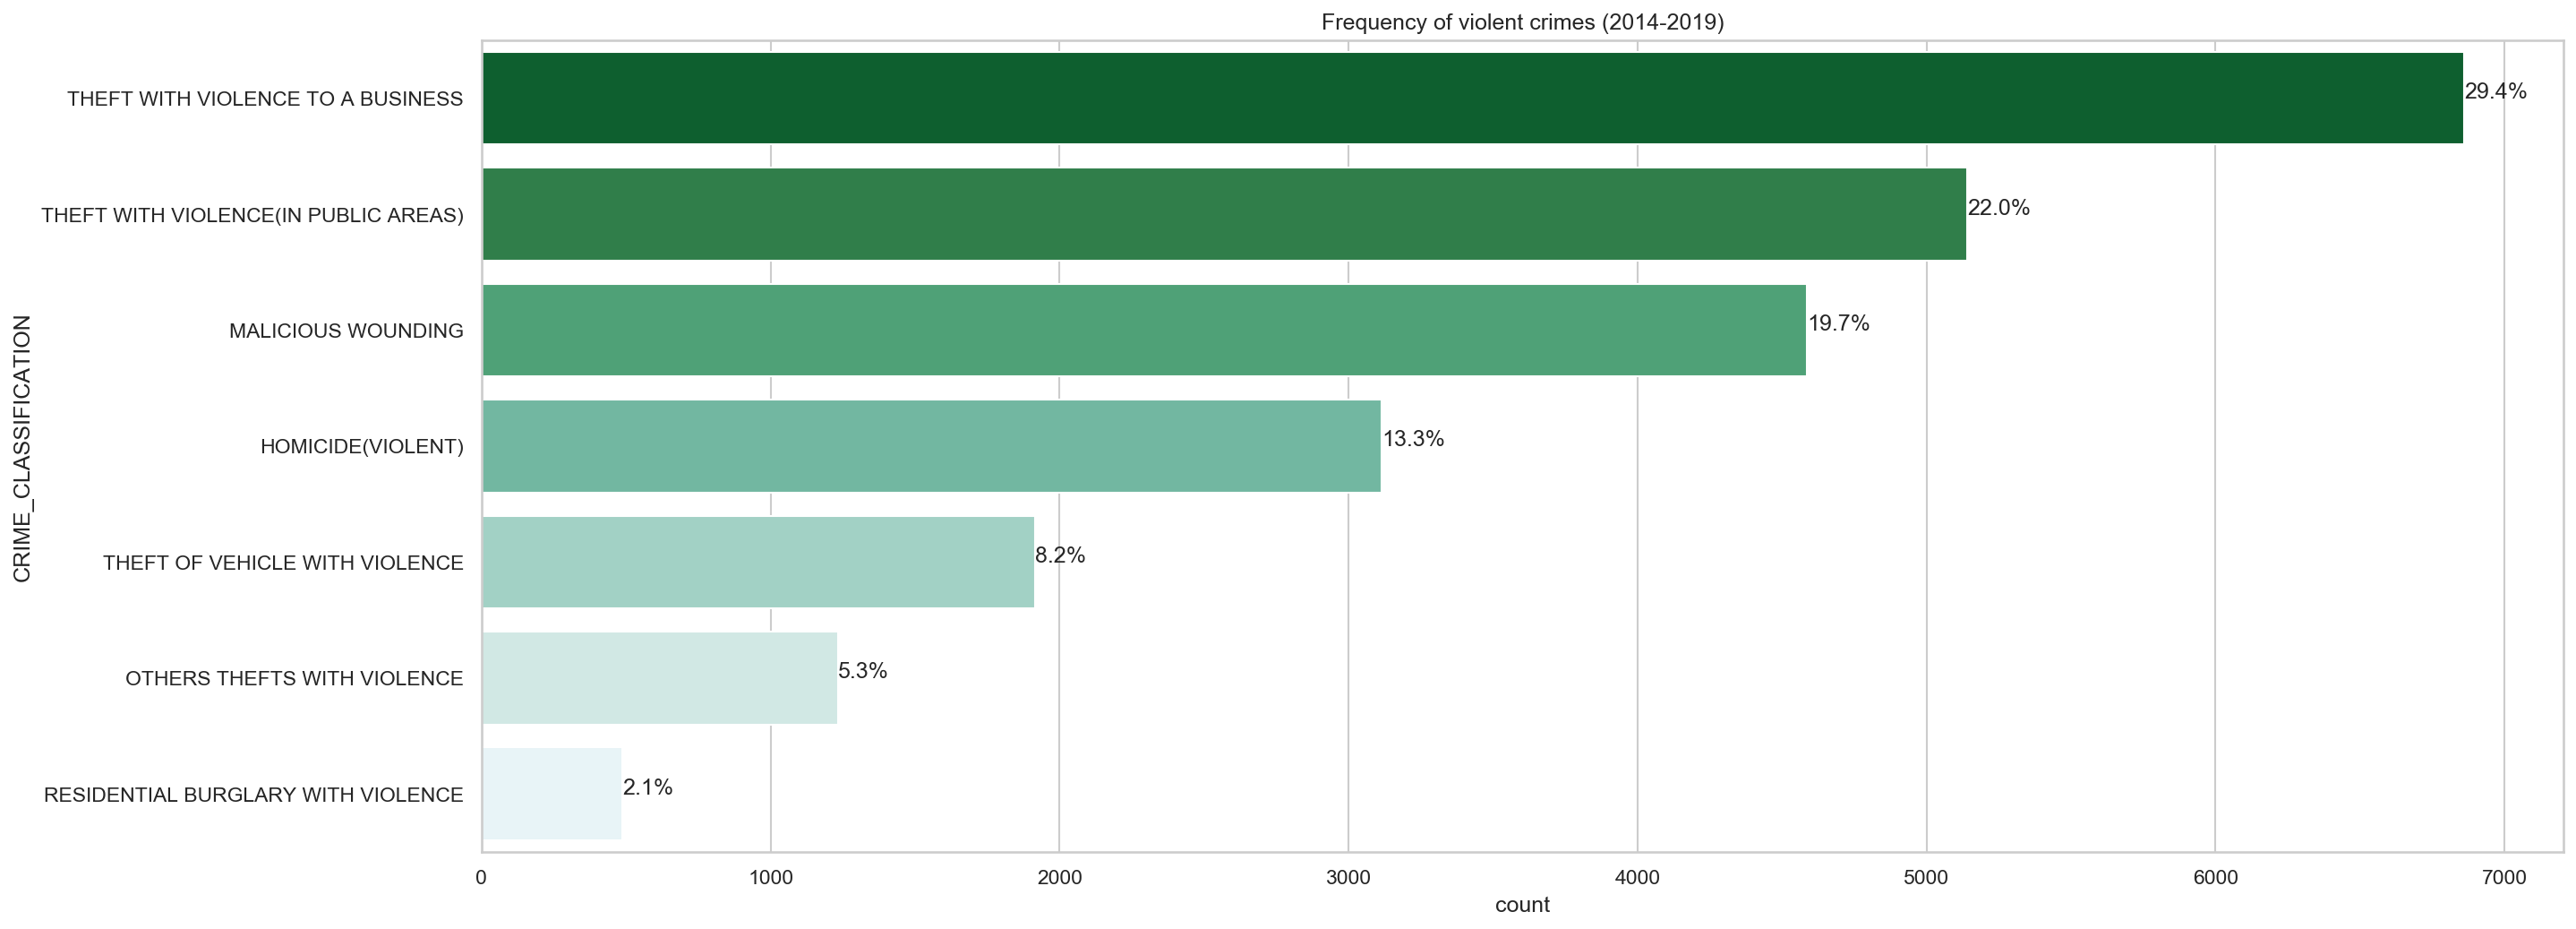

In [7]:
plt.figure(figsize=(20,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_Violence,y='CRIME_CLASSIFICATION', order =df_Violence['CRIME_CLASSIFICATION'].value_counts().index , palette='BuGn_r')
#ax.set_ylabel('totalCount')

plt.title('Frequency of violent crimes (2014-2019)')

total = len(df_Violence['CRIME_CLASSIFICATION'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.savefig('Crime_violent.pdf', dpi=500, bbox_inches='tight')
plt.show()

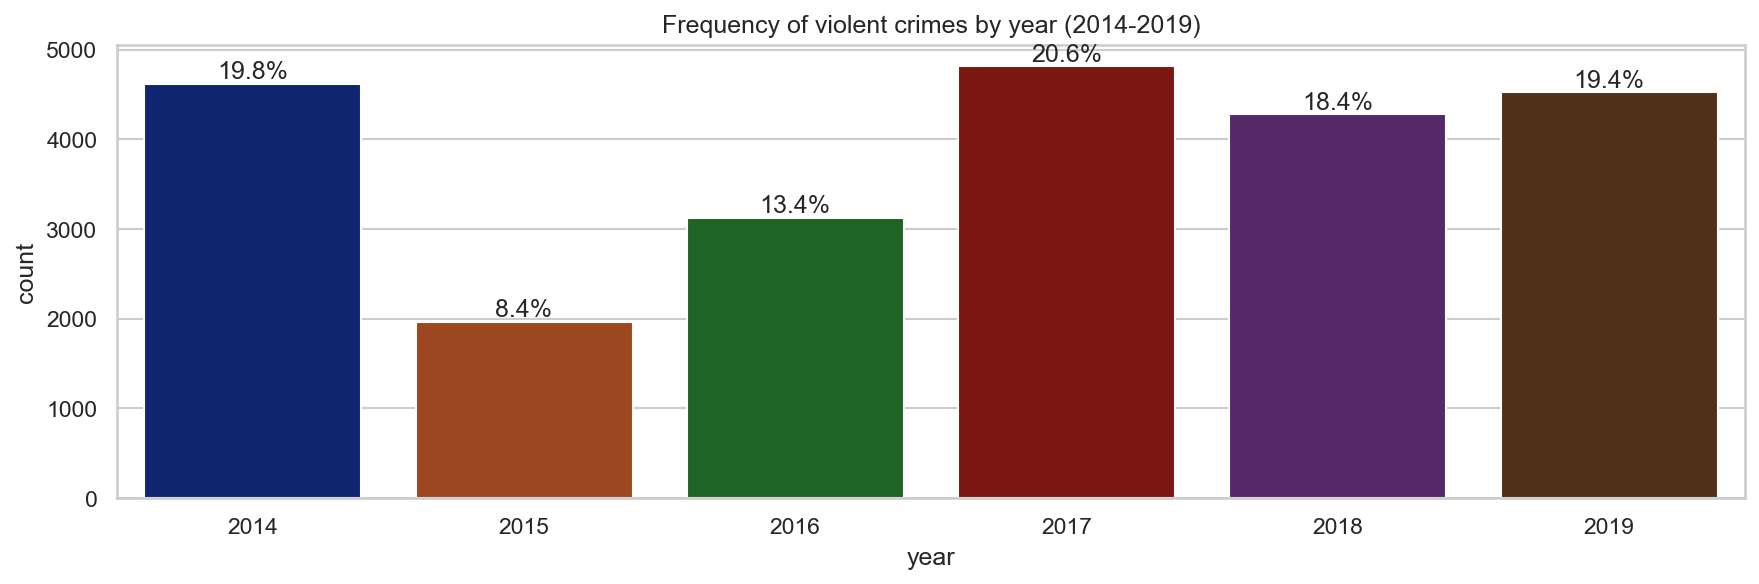

In [8]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_Violence,x='year', palette = 'dark')
plt.title('Frequency of violent crimes by year (2014-2019)')

ncount = len(df_Violence)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('violence_year.pdf', dpi=500, bbox_inches='tight')
plt.show()

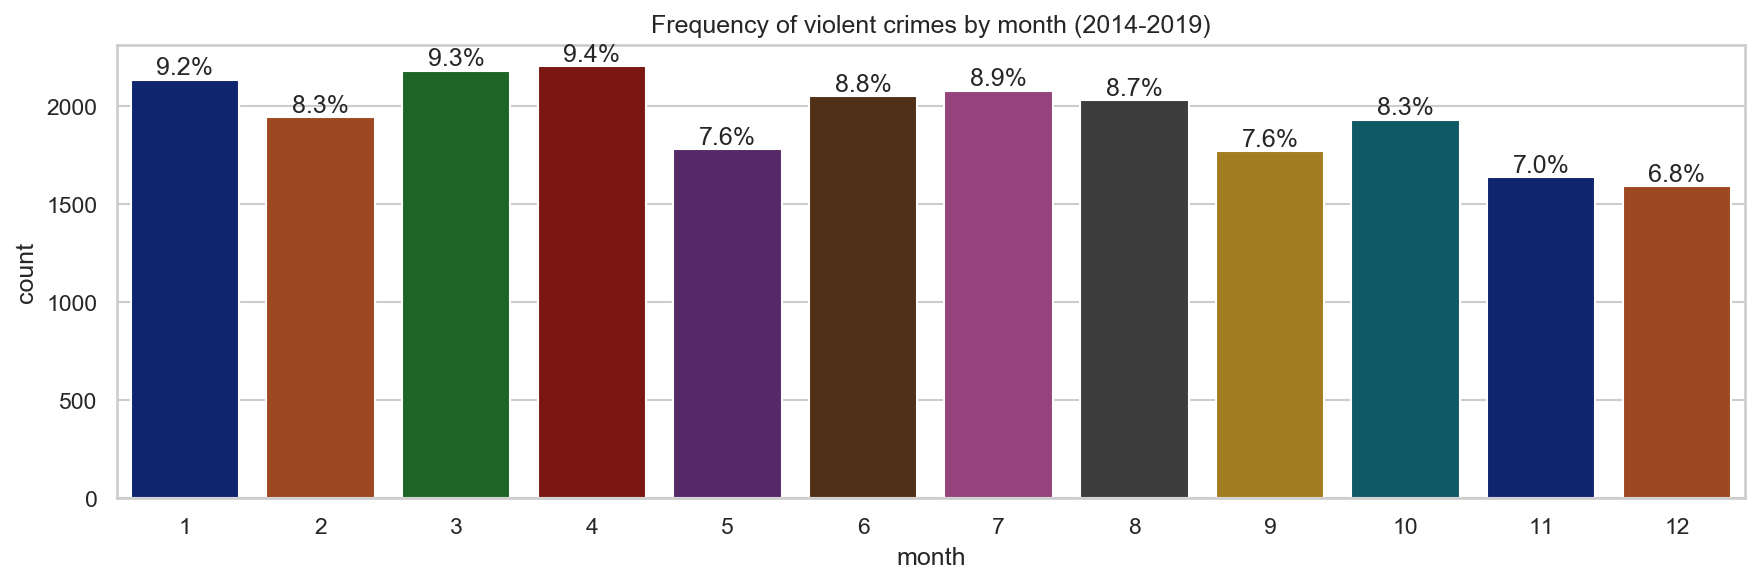

In [9]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_Violence,x='month', palette = 'dark')
plt.title('Frequency of violent crimes by month (2014-2019)')

ncount = len(df_Violence)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('violence_month.pdf', dpi=500, bbox_inches='tight')
plt.show()

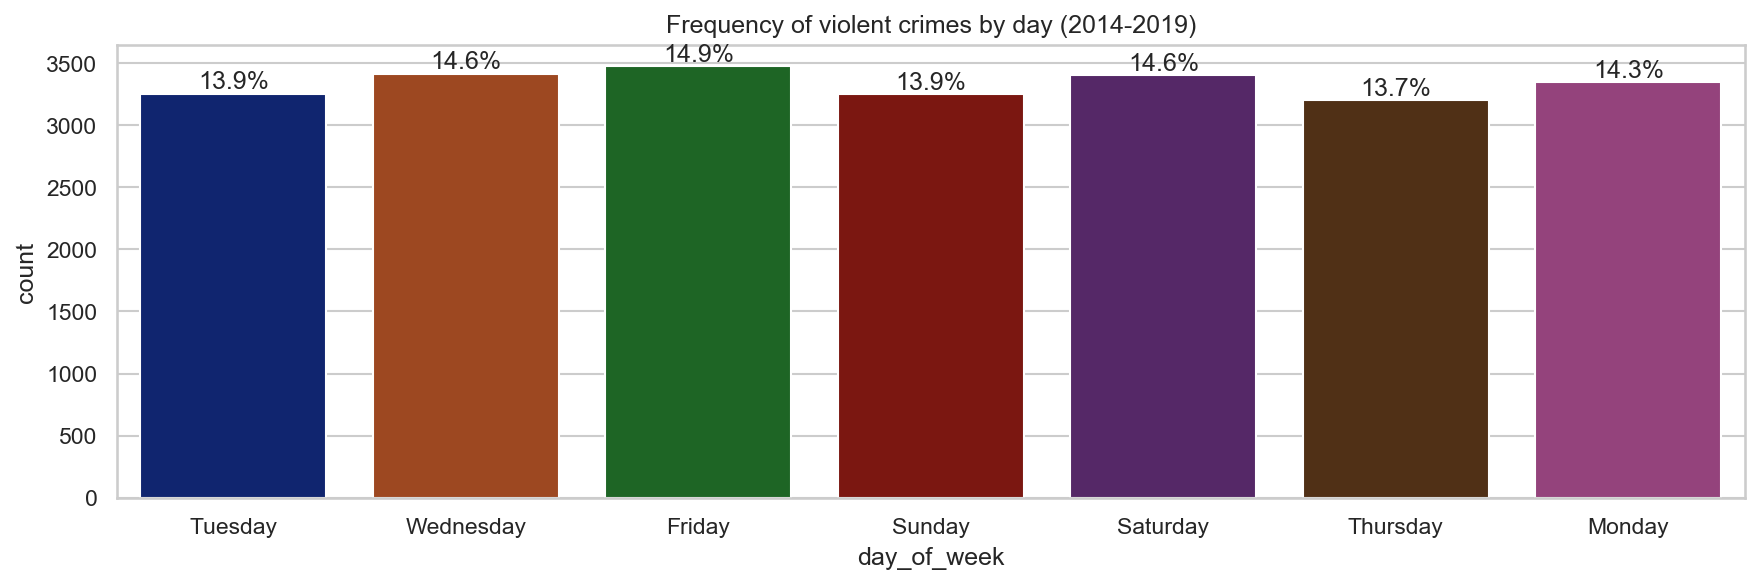

In [10]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_Violence,x='day_of_week', palette = 'dark')
plt.title('Frequency of violent crimes by day (2014-2019)')

ncount = len(df_Violence)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('violence_day.pdf', dpi=500, bbox_inches='tight')
plt.show()

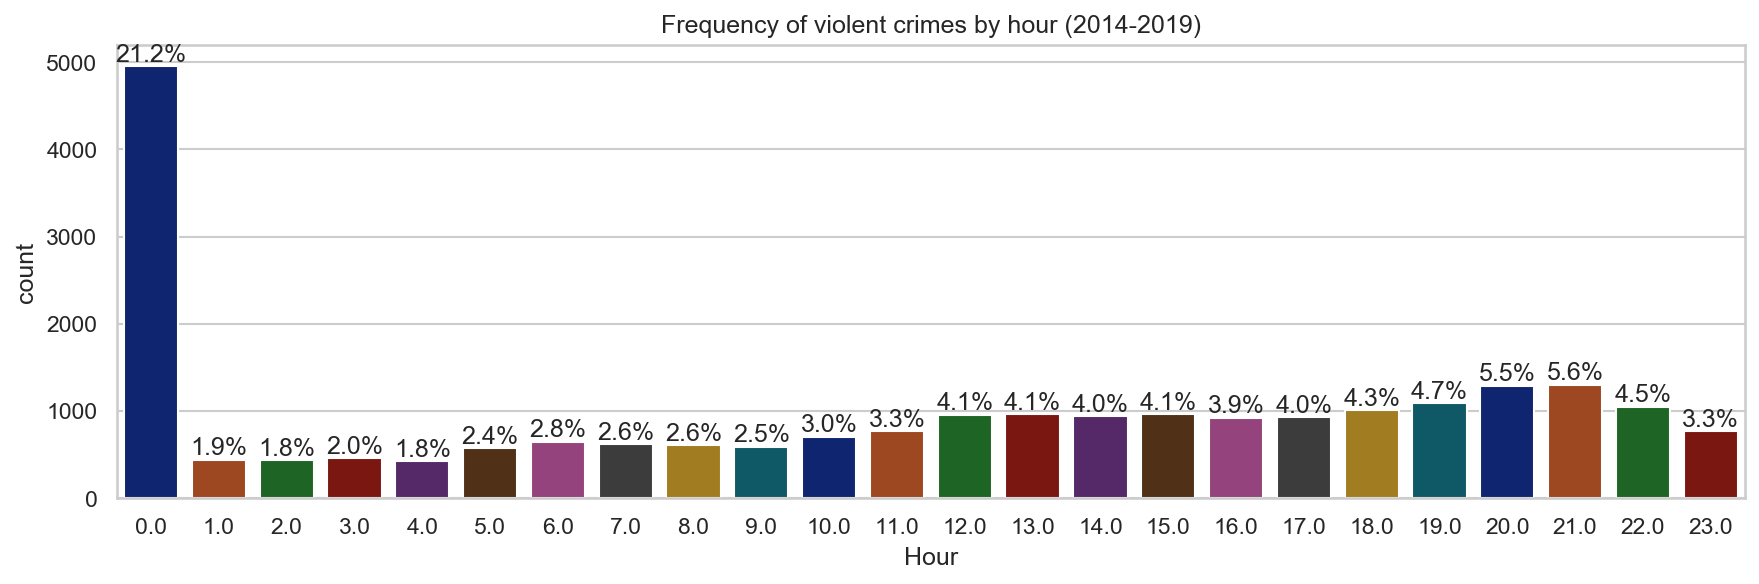

In [11]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_Violence,x='Hour', palette = 'dark')
plt.title('Frequency of violent crimes by hour (2014-2019)')

ncount = len(df_Violence)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('violence_hour.pdf', dpi=500, bbox_inches='tight')
plt.show()

# Exploring the more violent neighborhoods

Downloaded the 100 more violent neighborhood

In [13]:
path8 = 'https://raw.githubusercontent.com/victor-onofre/Capstone-Project/master/Crime%20data/100_NEIGHBORHOOD_MORE_VIOLENT_Counts_Crimes_with_coordinates_tijuana_from_2014_to_2019.csv'

In [14]:
Violent_NEIGHBORHOODS =  pd.read_csv(path8)

In [15]:
Violent_NEIGHBORHOODS.head(15)

,NEIGHBORHOOD_OF_THE_CRIME,counts,ADDRESS,location,latitude,longitude
0,ZONA CENTRO,1502,"ZONA CENTRO,Tijuana,Mexico","Zona Centro, Tijuana, Municipio de Tijuana, Ba...",32.532928,-117.036843
1,MARIANO MATAMOROS,1033,"MARIANO MATAMOROS,Tijuana,Mexico","Mariano Matamoros, SN, Calle Alicante, Otay Co...",32.513355,-116.945469
2,ZONA URBANA RIO TIJUANA,863,"ZONA URBANA RIO TIJUANA,Tijuana,Mexico","Zona Urbana Río Tijuana, Tijuana, Municipio de...",32.529637,-117.019868
3,CAMINO VERDE,544,"CAMINO VERDE,Tijuana,Mexico","Mexico, SN, Avenida Melchor Ocampo, Ejido Mata...",32.516067,-116.858502
4,MARIANO MATAMOROS NORTE,500,"MARIANO MATAMOROS NORTE,Tijuana,Mexico","Mariano Matamoros, SN, Calle Alicante, Otay Co...",32.513355,-116.945469
5,EL FLORIDO PRIMERA Y SEGUNDA SECCION,496,"EL FLORIDO PRIMERA Y SEGUNDA SECCION,Tijuana,M...",NaN,32.465500,-116.874800
6,NUEVA TIJUANA,491,"NUEVA TIJUANA,Tijuana,Mexico","Nueva, Ejido Matamoros, Villa del Sol Cuarta S...",32.518535,-116.849387
7,EL PIPILA,476,"EL PIPILA,Tijuana,Mexico","Pipila, Jalisco, Misiones de Pedregal Fraccion...",32.488164,-116.953558
8,RIO TIJUANA TERCERA ETAPA,471,"RIO TIJUANA TERCERA ETAPA,Tijuana,Mexico",NaN,32.506700,-116.941100
9,LA MESA,436,"LA MESA,Tijuana,Mexico","La Mesa, Del. Sanchez Taboada, Tijuana, Munici...",32.449781,-116.988679


In [16]:
Violent_NEIGHBORHOODS.tail()

,NEIGHBORHOOD_OF_THE_CRIME,counts,ADDRESS,location,latitude,longitude
95,CIUDAD JARDIN,101,"CIUDAD JARDIN,Tijuana,Mexico","Ciudad Jardín, Tijuana, Municipio de Tijuana, ...",32.511764,-117.063674
96,ALTAMIRA,100,"ALTAMIRA,Tijuana,Mexico","Lima, Francisco Villa, Tijuana, Municipio de T...",32.524653,-117.054166
97,GUADALUPE VICTORIA,97,"GUADALUPE VICTORIA,Tijuana,Mexico","Guadalupe Victoria, El Porvenir, Tijuana, Muni...",32.450429,-116.944847
98,ALEMAN,96,"ALEMAN,Tijuana,Mexico","Xicotencatl Leyva Alemán, Tijuana, Municipio d...",32.519771,-117.099615
99,CAMPOS,94,"CAMPOS,Tijuana,Mexico","Campos de Baseball Otay, Misiones de Pedregal ...",32.536841,-116.946155


In [17]:
to_drop= np.arange(15, 100)
for ii in to_drop:
    Violent_NEIGHBORHOODS = Violent_NEIGHBORHOODS.drop([ii], axis=0) 

In [18]:
Violent_NEIGHBORHOODS.tail(15)

,NEIGHBORHOOD_OF_THE_CRIME,counts,ADDRESS,location,latitude,longitude
0,ZONA CENTRO,1502,"ZONA CENTRO,Tijuana,Mexico","Zona Centro, Tijuana, Municipio de Tijuana, Ba...",32.532928,-117.036843
1,MARIANO MATAMOROS,1033,"MARIANO MATAMOROS,Tijuana,Mexico","Mariano Matamoros, SN, Calle Alicante, Otay Co...",32.513355,-116.945469
2,ZONA URBANA RIO TIJUANA,863,"ZONA URBANA RIO TIJUANA,Tijuana,Mexico","Zona Urbana Río Tijuana, Tijuana, Municipio de...",32.529637,-117.019868
3,CAMINO VERDE,544,"CAMINO VERDE,Tijuana,Mexico","Mexico, SN, Avenida Melchor Ocampo, Ejido Mata...",32.516067,-116.858502
4,MARIANO MATAMOROS NORTE,500,"MARIANO MATAMOROS NORTE,Tijuana,Mexico","Mariano Matamoros, SN, Calle Alicante, Otay Co...",32.513355,-116.945469
5,EL FLORIDO PRIMERA Y SEGUNDA SECCION,496,"EL FLORIDO PRIMERA Y SEGUNDA SECCION,Tijuana,M...",NaN,32.465500,-116.874800
6,NUEVA TIJUANA,491,"NUEVA TIJUANA,Tijuana,Mexico","Nueva, Ejido Matamoros, Villa del Sol Cuarta S...",32.518535,-116.849387
7,EL PIPILA,476,"EL PIPILA,Tijuana,Mexico","Pipila, Jalisco, Misiones de Pedregal Fraccion...",32.488164,-116.953558
8,RIO TIJUANA TERCERA ETAPA,471,"RIO TIJUANA TERCERA ETAPA,Tijuana,Mexico",NaN,32.506700,-116.941100
9,LA MESA,436,"LA MESA,Tijuana,Mexico","La Mesa, Del. Sanchez Taboada, Tijuana, Munici...",32.449781,-116.988679


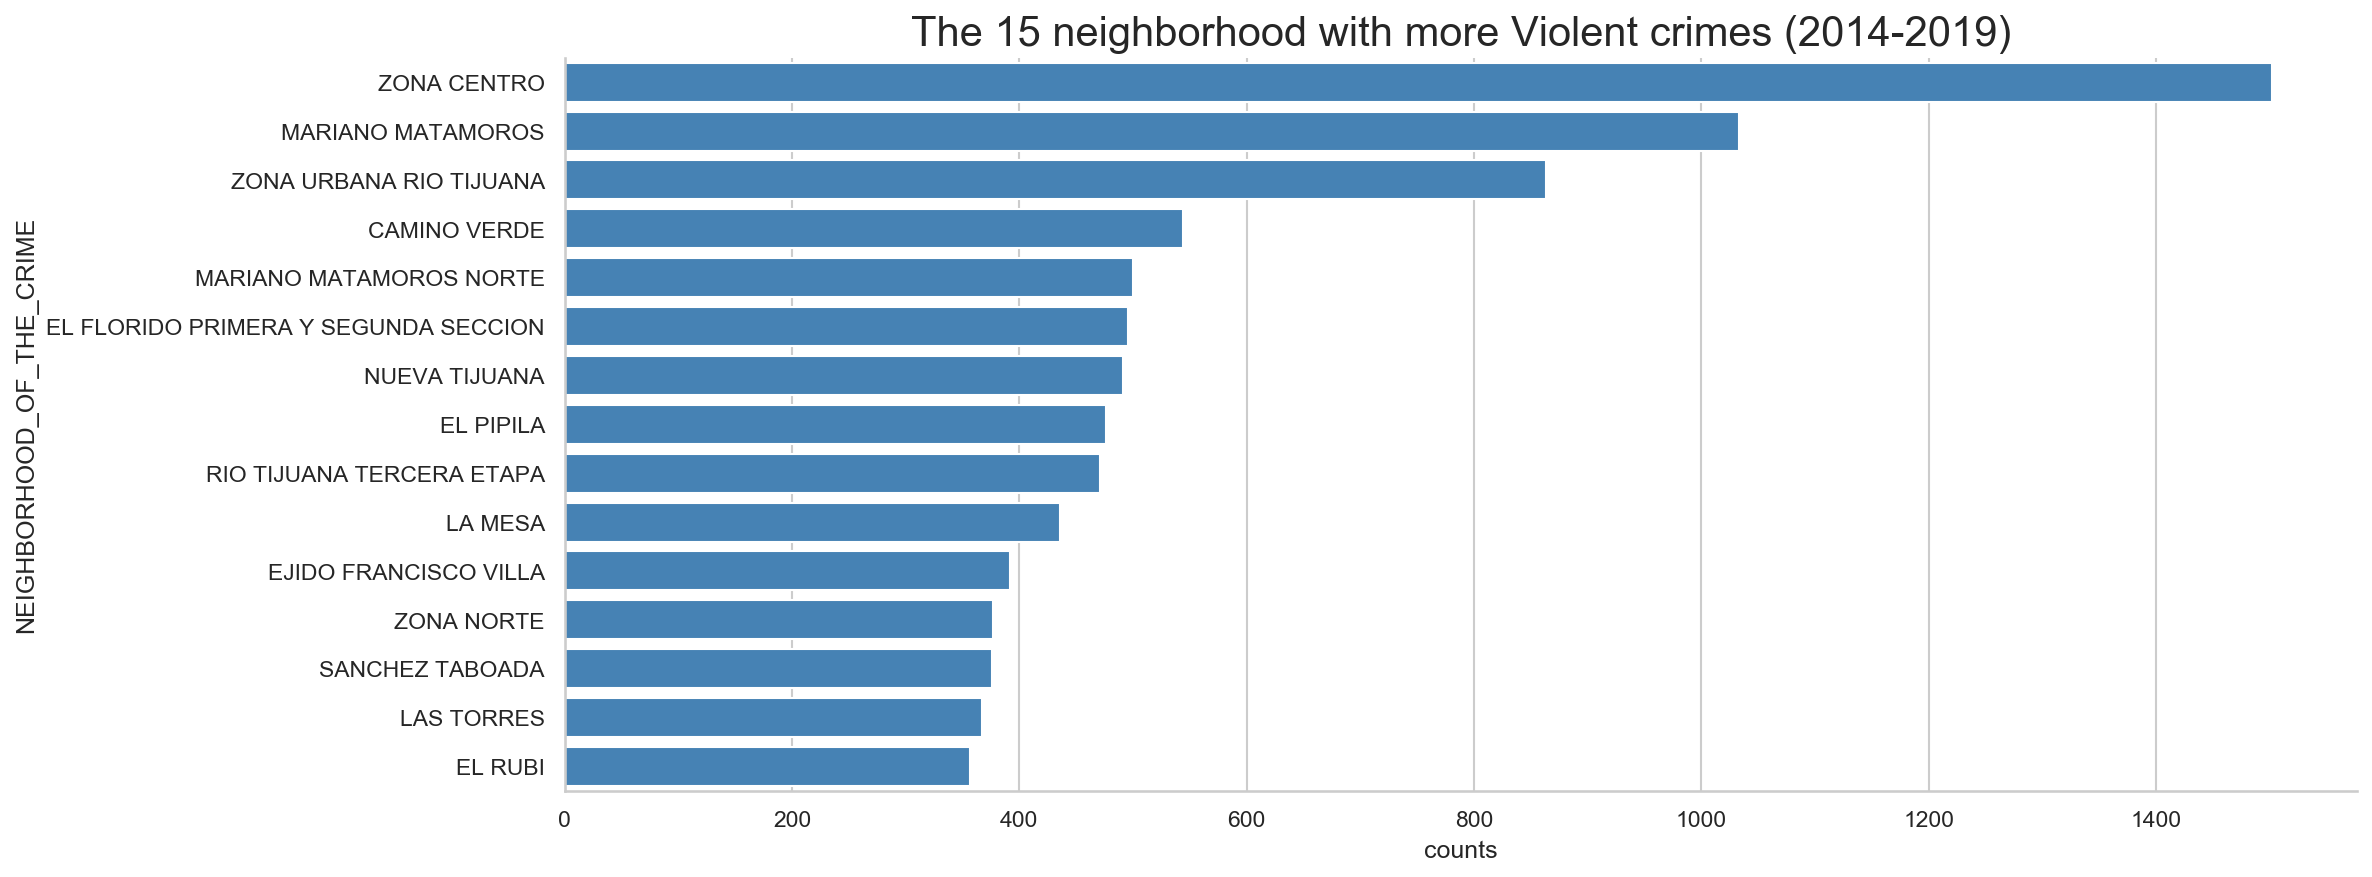

In [19]:
# create a count plot for all crime scene locations
g = sns.catplot(x='counts',
                   y='NEIGHBORHOOD_OF_THE_CRIME',
                   data=Violent_NEIGHBORHOODS,
                   kind='bar',
                   height=10,
                   orient = 'h',
                   color='steelblue', 
                   saturation=10)
g.fig.set_size_inches(20,6)
#g.set_xticklabels(rotation=90)
plt.title("The 15 neighborhood with more Violent crimes (2014-2019)", fontsize=20)
plt.subplots_adjust(top=0.88)
plt.savefig('violent_crimes_colonias.pdf', dpi = 500, bbox_inches='tight')

Downloaded the crime data from my Github

In [21]:
path9 = 'https://raw.githubusercontent.com/victor-onofre/Capstone-Project/master/Crime%20data/ENGLISH_Clean_crime_tijuana_from_2014_to_2019.csv'

In [22]:
crime = pd.read_csv(path9)

In [23]:
crime.head()

,CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,DATE OF RECORD OF THE CRIME,TIME OF THE CRIME,MUNICIPIO,DATE OF THE CRIME,day_of_week,year,month,day,Hour
0,VEHICLE THEFT,VILLA DEL REAL III,01/01/19,19:00,TIJUANA,2018-12-31,Monday,2018,12,31,19.0
1,RESIDENTIAL BURGLARY,LOMAS DE LA AMISTAD,01/01/19,02:00,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
2,THEFT WITH VIOLENCE(IN PUBLIC AREAS),3 DE OCTUBRE,01/01/19,02:39,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
3,VEHICLE THEFT,EMPERADORES,01/01/19,02:00,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
4,UNLAWFUL WOUNDING,RESIDENCIAL DEL BOSQUE,01/01/19,23:21,TIJUANA,2018-12-31,Monday,2018,12,31,23.0


In [24]:
crime.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136082 entries, 0 to 136081
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CRIME CLASSIFICATION         136082 non-null  object 
 1   NEIGHBORHOOD OF THE CRIME    136082 non-null  object 
 2   DATE OF RECORD OF THE CRIME  136082 non-null  object 
 3   TIME OF THE CRIME            136082 non-null  object 
 4   MUNICIPIO                    136082 non-null  object 
 5   DATE OF THE CRIME            136082 non-null  object 
 6   day_of_week                  136082 non-null  object 
 7   year                         136082 non-null  int64  
 8   month                        136082 non-null  int64  
 9   day                          136082 non-null  int64  
 10  Hour                         136082 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 11.4+ MB


## Histograms about homicides

In [25]:
df_homicide = crime[crime['CRIME CLASSIFICATION']=='HOMICIDE(VIOLENT)']
df_homicide.head()

,CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,DATE OF RECORD OF THE CRIME,TIME OF THE CRIME,MUNICIPIO,DATE OF THE CRIME,day_of_week,year,month,day,Hour
5,HOMICIDE(VIOLENT),SANCHEZ TABOADA,01/01/19,01:25,TIJUANA,2019-01-01,Tuesday,2019,1,1,1.0
9,HOMICIDE(VIOLENT),3 DE OCTUBRE,06/01/19,20:41,TIJUANA,2019-05-01,Wednesday,2019,5,1,20.0
21,HOMICIDE(VIOLENT),POBLADO EJIDO MATAMOROS,01/01/19,12:50,TIJUANA,2019-01-01,Tuesday,2019,1,1,12.0
29,HOMICIDE(VIOLENT),ALBATROS,17/02/19,21:50,TIJUANA,2019-02-16,Saturday,2019,2,16,21.0
50,HOMICIDE(VIOLENT),LOS VALLES,17/01/19,14:06,TIJUANA,2019-01-17,Thursday,2019,1,17,14.0


In [26]:
df_homicide.shape

(6556, 11)

In [27]:
dfHomicide = df_homicide.dropna()
dfHomicide.isnull().sum().sum()

0

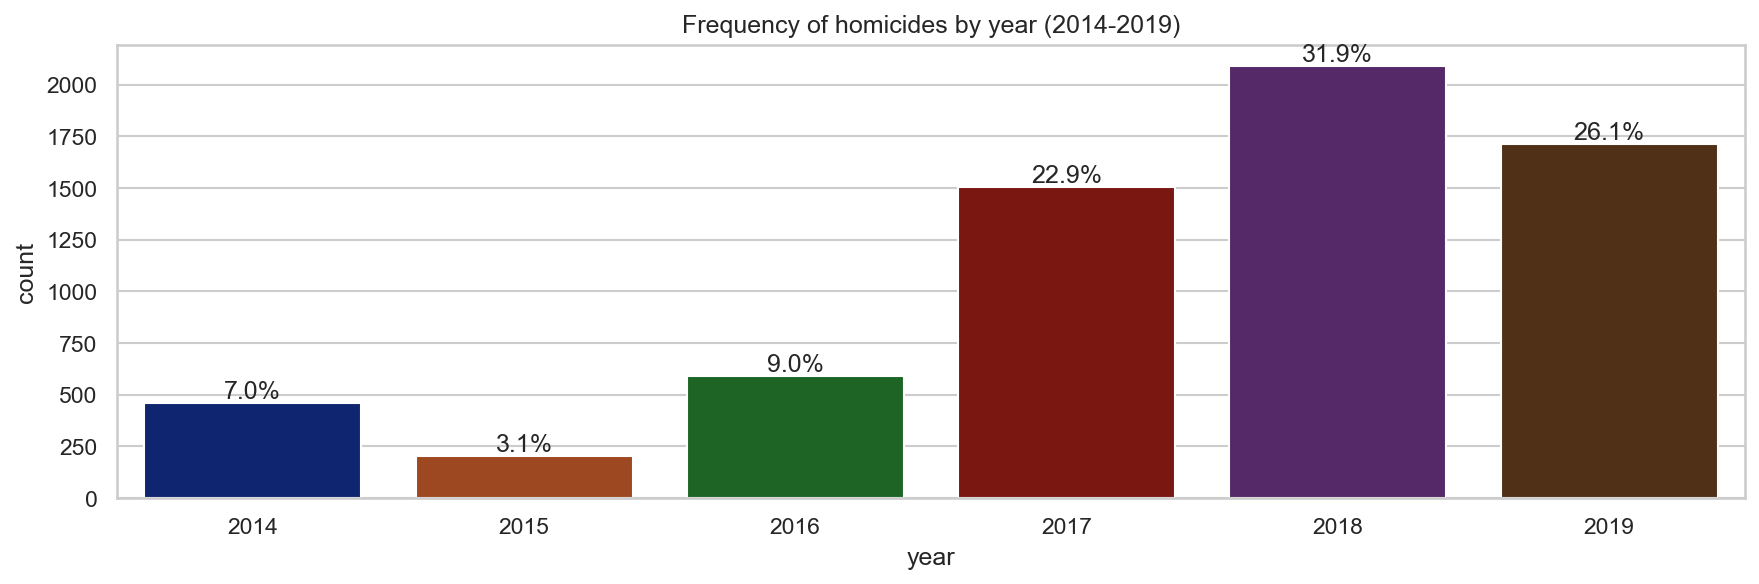

In [28]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_homicide,x='year', palette = 'dark')
plt.title('Frequency of homicides by year (2014-2019)')

ncount = len(df_homicide)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('homicides_year.pdf', dpi=500 , bbox_inches='tight')
plt.show()

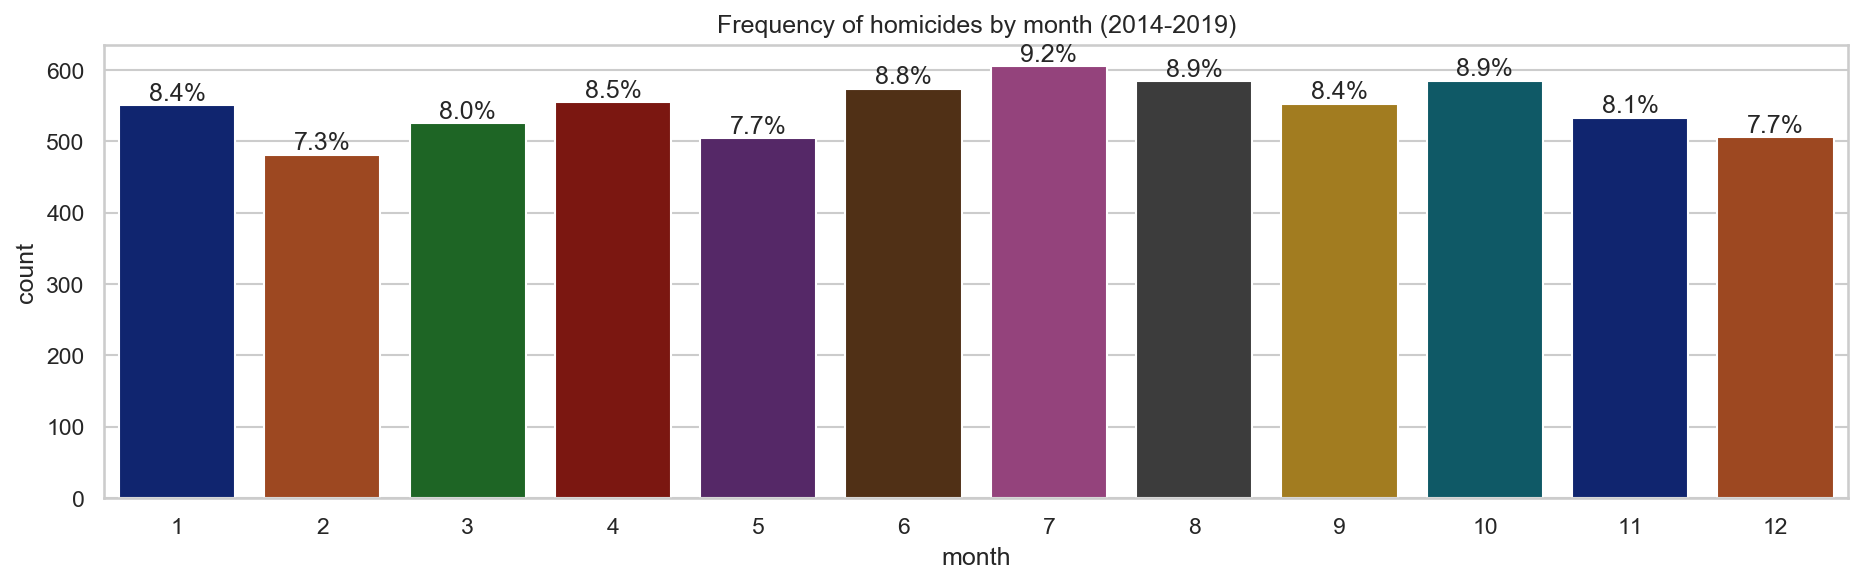

In [29]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_homicide,x='month', palette = 'dark')
plt.title('Frequency of homicides by month (2014-2019)')

ncount = len(df_homicide)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('homicides_month.pdf', dpi=500, bbox_inches='tight')
plt.show()

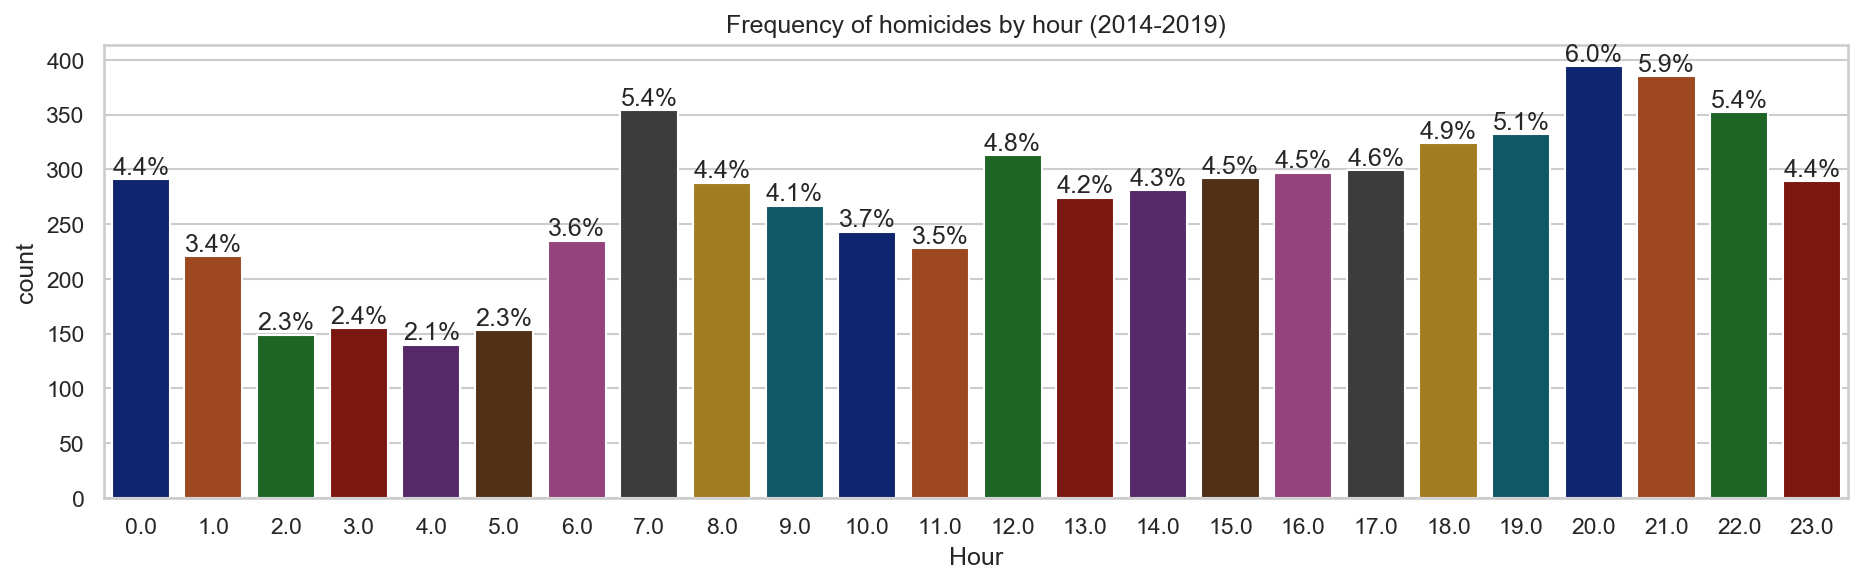

In [30]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_homicide,x='Hour', palette = 'dark')
plt.title('Frequency of homicides by hour (2014-2019)')

ncount = len(df_homicide)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('homicides_hour.pdf', dpi=500,bbox_inches='tight')
plt.show()

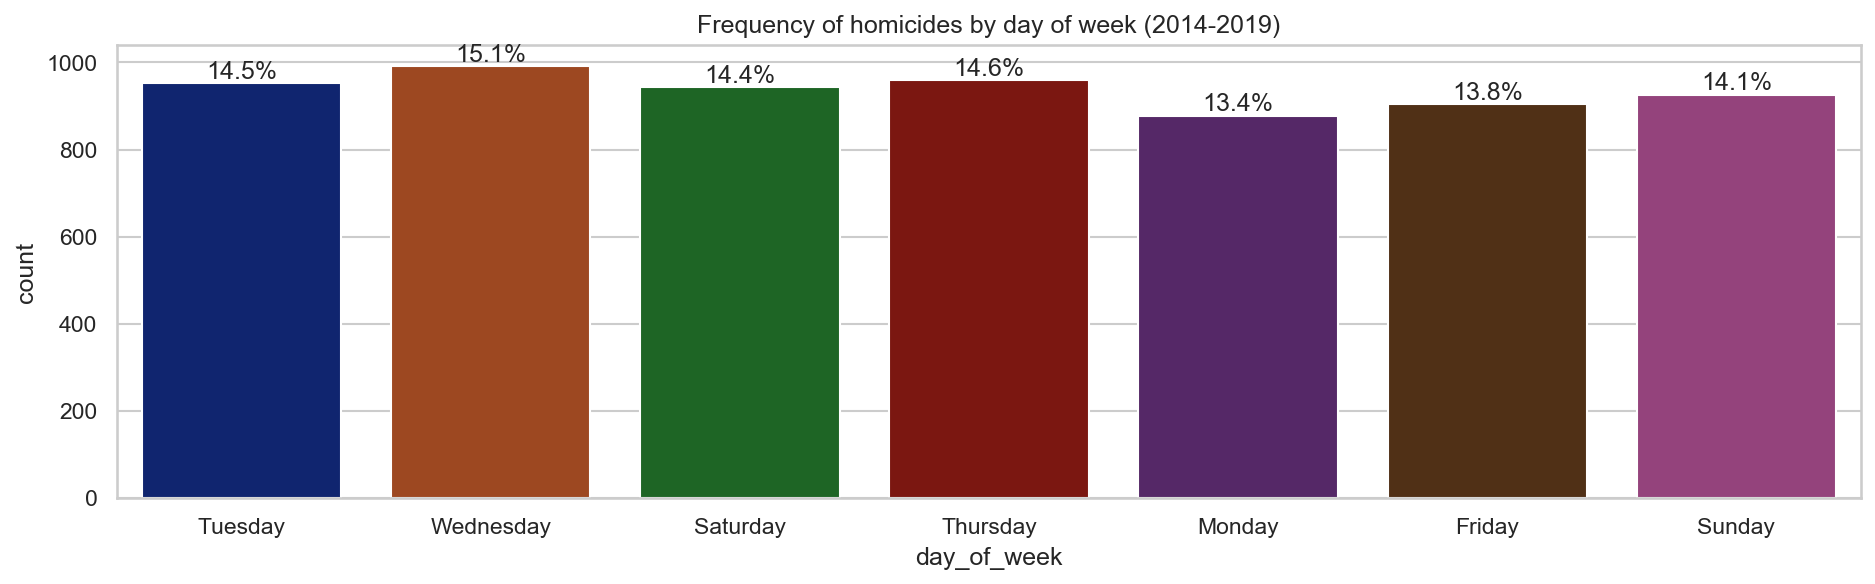

In [31]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_homicide,x='day_of_week', palette = 'dark')
plt.title('Frequency of homicides by day of week (2014-2019)')

ncount = len(df_homicide)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('homicides_day.pdf', dpi=500, bbox_inches='tight')
plt.show()

In [32]:
# visualize the "scene of the crime" vs. number of occurences at such scene
NEIGHBORHOOD_homicide  = df_homicide['CRIME CLASSIFICATION'].\
            groupby(df_homicide['NEIGHBORHOOD OF THE CRIME']).\
            value_counts().\
            unstack().\
            sort_values('HOMICIDE(VIOLENT)',ascending=False).\
            reset_index()
    
NEIGHBORHOOD_homicide.head(15)

CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,HOMICIDE(VIOLENT)
0,CAMINO VERDE,204
1,ZONA NORTE,173
2,SANCHEZ TABOADA,129
3,ZONA CENTRO,113
4,3 DE OCTUBRE,91
5,FRACC HCDA LAS DELICIAS,86
6,NO DEFINIDO,84
7,MARIANO MATAMOROS,81
8,NUEVA TIJUANA,79
9,EJIDO FRANCISCO VILLA,72


In [33]:
NEIGHBORHOOD_homicide.tail()

CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,HOMICIDE(VIOLENT)
1084,NATURA SECC. ARBOLEDAS,1
1085,EL CHICOTE,1
1086,NINOS HEROES,1
1087,EL CHAPARRAL,1
1088,ZONA URBANA TIJUANA,1


In [34]:
to_drop2= np.arange(15, 1089)
for ii in to_drop2:
       NEIGHBORHOOD_homicide = NEIGHBORHOOD_homicide.drop([ii], axis=0) 

In [35]:
NEIGHBORHOOD_homicide.tail()

CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,HOMICIDE(VIOLENT)
10,URBIVILLA DEL PRADO,65
11,EL FLORIDO PRIMERA Y SEGUNDA SECCION,65
12,URBIVILLA DEL PRADO 2,63
13,EL PIPILA,60
14,PEDREGAL DE SANTA JULIA,58


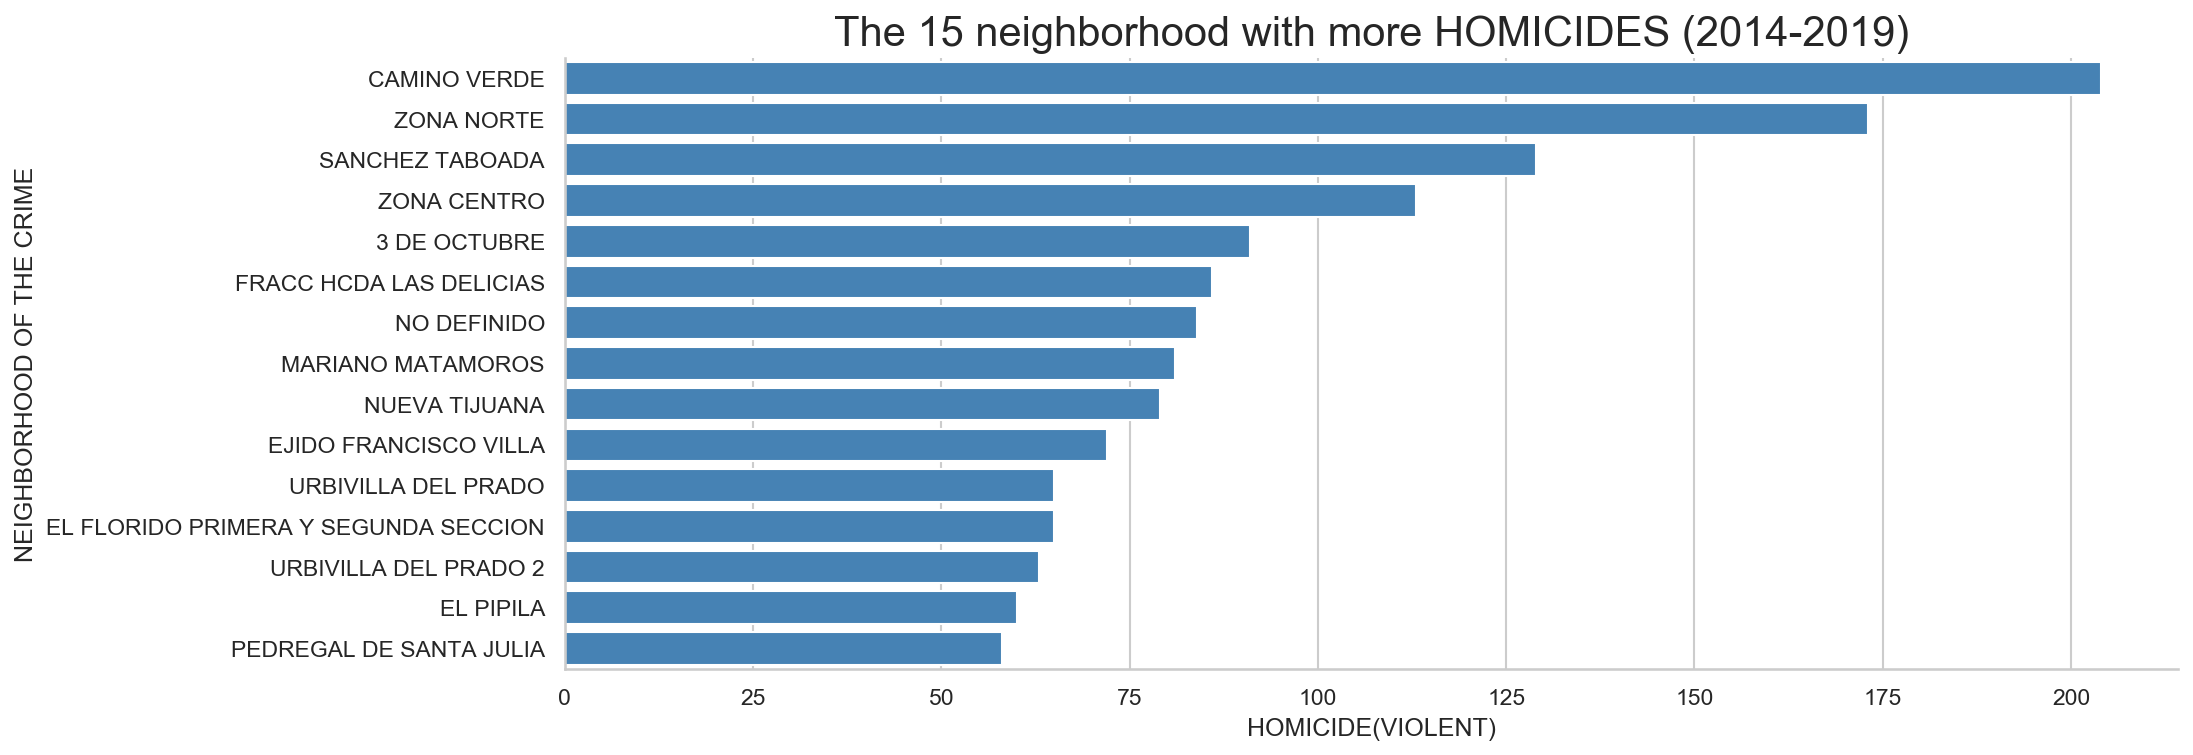

In [36]:
# create a count plot for all crime scene locations
g = sns.catplot(x='HOMICIDE(VIOLENT)',
                   y='NEIGHBORHOOD OF THE CRIME',
                   data=NEIGHBORHOOD_homicide ,
                   kind='bar',
                   height=10,
                   orient = 'h',
                   color='steelblue', 
                   saturation=10)
g.fig.set_size_inches(18,5)
#g.set_xticklabels(rotation=90)
plt.title("The 15 neighborhood with more HOMICIDES (2014-2019)", fontsize=20)
plt.subplots_adjust(top=0.88)
plt.savefig('HOMICIDES_neighborhood.pdf', dpi=500 ,bbox_inches='tight')

## Histograms about THEFT WITH VIOLENCE TO A BUSINESS

In [37]:
df_theft_business = crime[crime['CRIME CLASSIFICATION']=='THEFT WITH VIOLENCE TO A BUSINESS']
df_theft_business.head()

,CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,DATE OF RECORD OF THE CRIME,TIME OF THE CRIME,MUNICIPIO,DATE OF THE CRIME,day_of_week,year,month,day,Hour
11,THEFT WITH VIOLENCE TO A BUSINESS,RIO TIJUANA TERCERA ETAPA,05/01/19,17:55,TIJUANA,2019-05-01,Wednesday,2019,5,1,17.0
16,THEFT WITH VIOLENCE TO A BUSINESS,AGUAJE DE LA TUNA PRIMERA SECCION,14/01/19,21:39,TIJUANA,2019-02-01,Friday,2019,2,1,21.0
32,THEFT WITH VIOLENCE TO A BUSINESS,LA MORITA,01/01/19,11:28,TIJUANA,2019-01-01,Tuesday,2019,1,1,11.0
36,THEFT WITH VIOLENCE TO A BUSINESS,ALFONSO CORONA DEL ROSAL,11/01/19,10:20,TIJUANA,2019-10-01,Tuesday,2019,10,1,10.0
44,THEFT WITH VIOLENCE TO A BUSINESS,VILLA FONTANA I,02/01/19,17:50,TIJUANA,2019-01-01,Tuesday,2019,1,1,17.0


In [38]:
df_theft_business.shape

(12154, 11)

In [39]:
df_theftBusiness = df_theft_business.dropna()
df_theftBusiness.isnull().sum().sum()

0

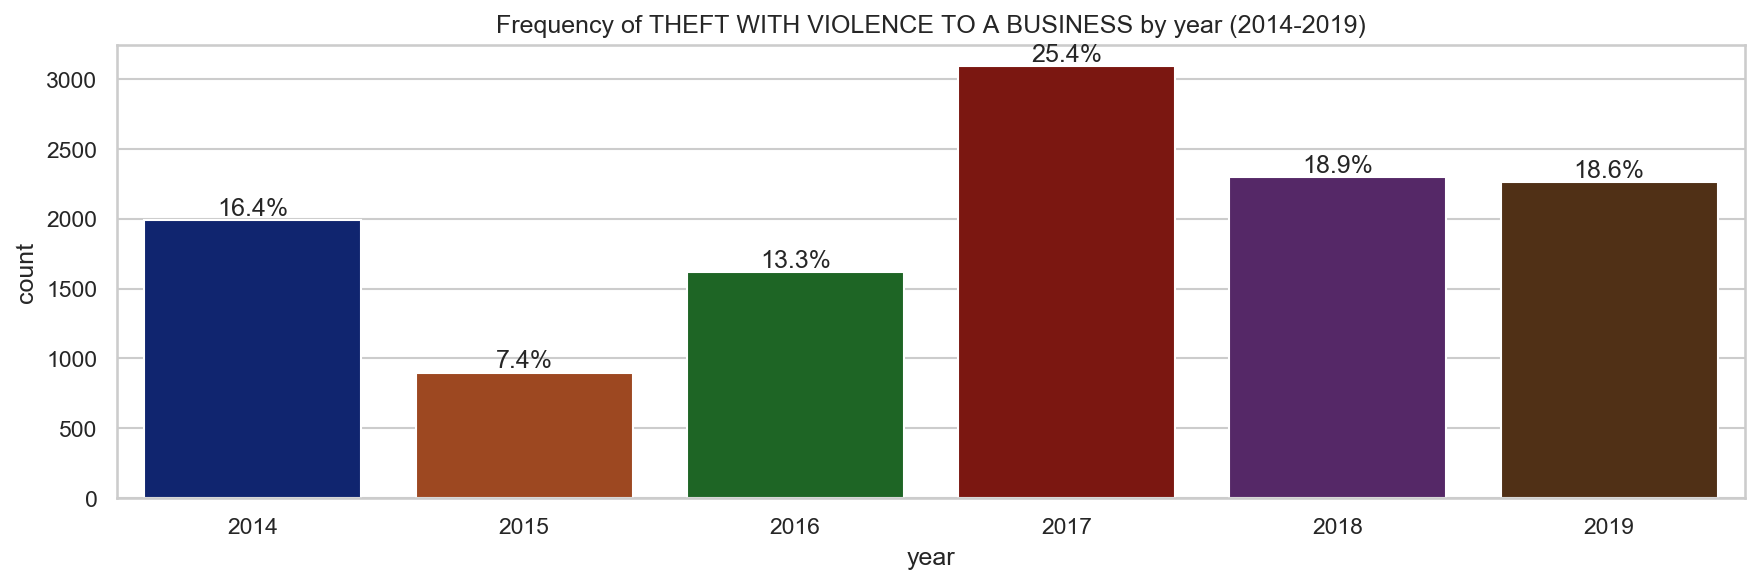

In [40]:
plt.figure(figsize=(14,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_theftBusiness,x='year', palette = 'dark')
plt.title('Frequency of THEFT WITH VIOLENCE TO A BUSINESS by year (2014-2019)')

ncount = len(df_theftBusiness)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('THEFT_BUSINESS_year.pdf', dpi=500, bbox_inches='tight')
plt.show()

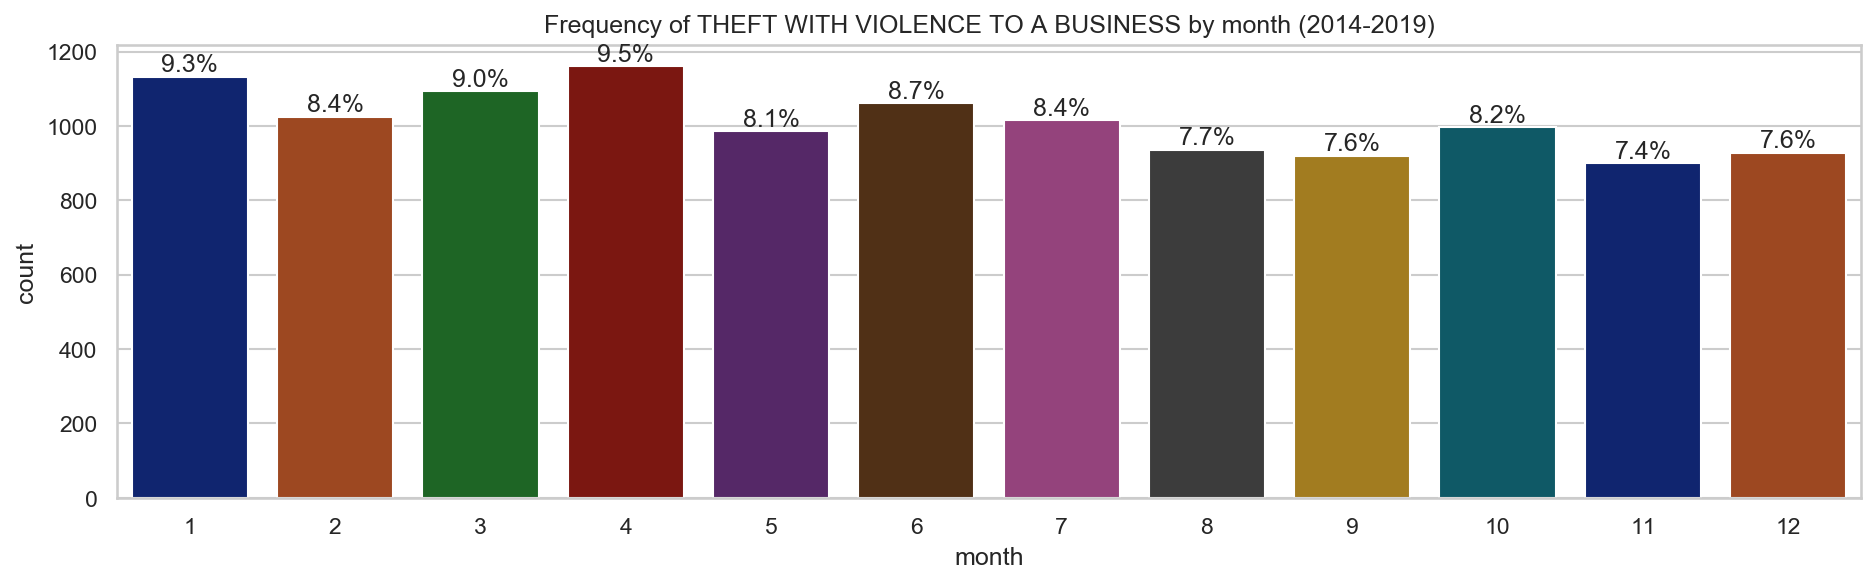

In [41]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_theftBusiness,x='month', palette = 'dark')
plt.title('Frequency of THEFT WITH VIOLENCE TO A BUSINESS by month (2014-2019)')

ncount = len(df_theftBusiness)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('THEFT_BUSINESS_month.pdf', dpi=500, bbox_inches='tight')
plt.show()

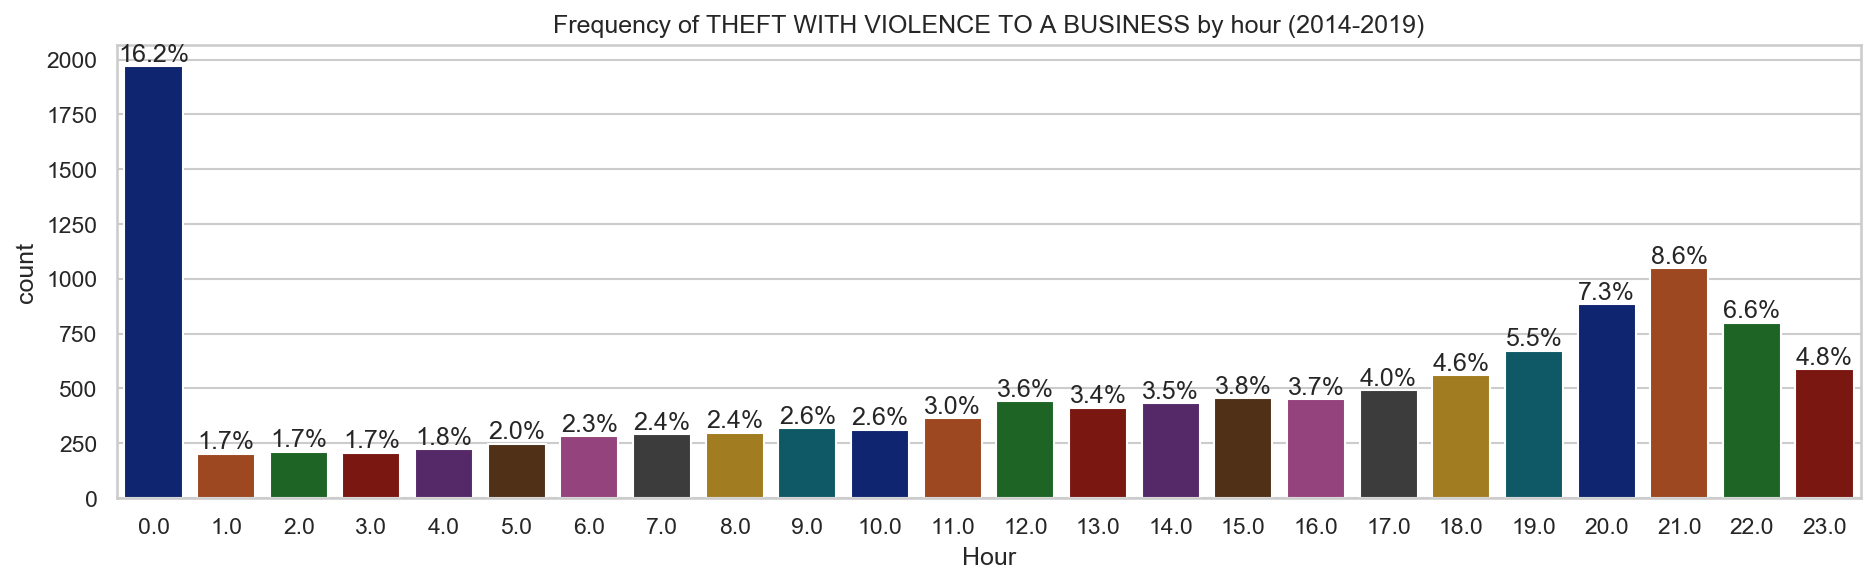

In [42]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_theftBusiness,x='Hour', palette = 'dark')
plt.title('Frequency of THEFT WITH VIOLENCE TO A BUSINESS by hour (2014-2019)')

ncount = len(df_theftBusiness)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('THEFT_BUSINESS_hour.pdf', dpi=500, bbox_inches='tight')
plt.show()

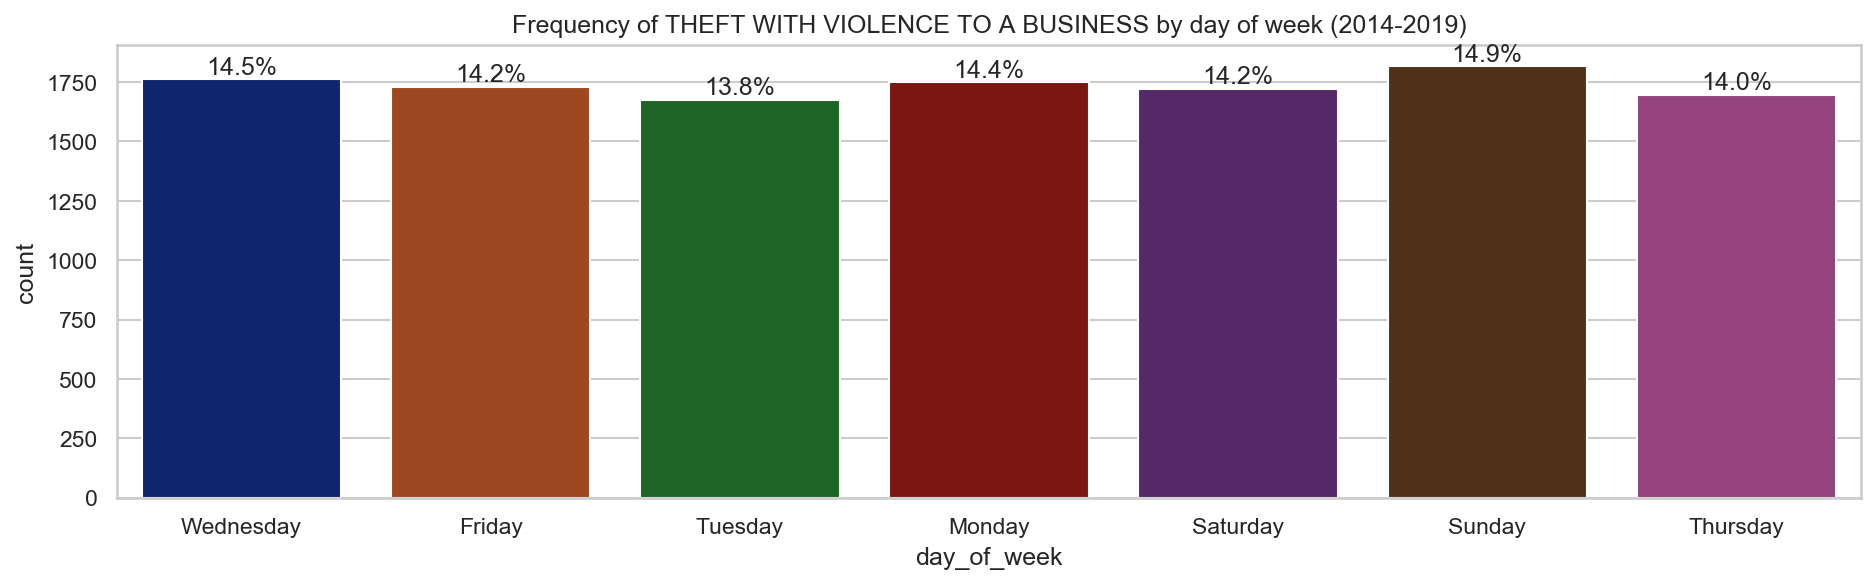

In [43]:
plt.figure(figsize=(15,4)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df_theftBusiness,x='day_of_week', palette = 'dark')
plt.title('Frequency of THEFT WITH VIOLENCE TO A BUSINESS by day of week (2014-2019)')

ncount = len(df_theftBusiness)
for p in ax.patches:
    x=p.get_bbox().get_points()[:,0]
    y=p.get_bbox().get_points()[1,1]
    ax.annotate('{:.1f}%'.format(100.*y/ncount), (x.mean(), y), 
            ha='center', va='bottom') # set the alignment of the text
    
plt.savefig('THEFT_BUSINESS_day.pdf', dpi=500, bbox_inches='tight')
plt.show()

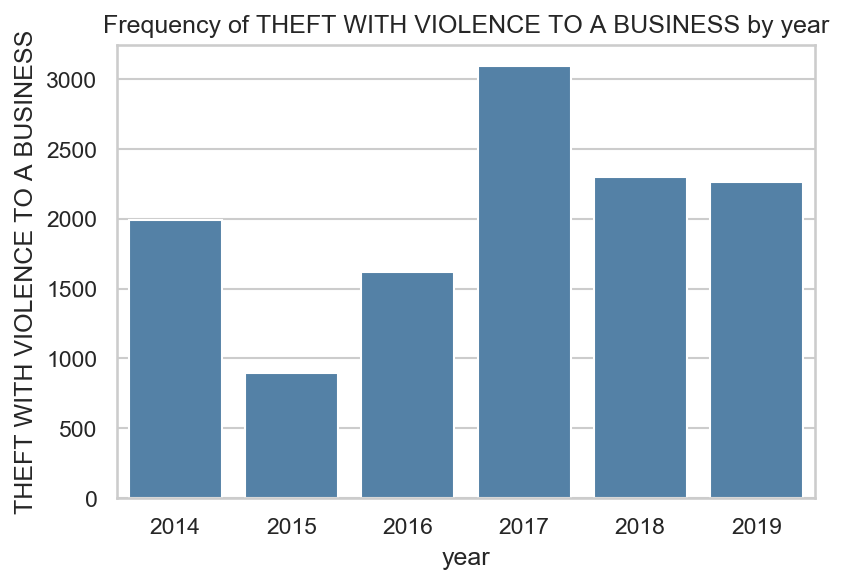

In [44]:
# plot bar chart of homicide rates for all yearsplt.figure(figsize=(12,6))
ax = sns.barplot(x='year',
            y='THEFT WITH VIOLENCE TO A BUSINESS',
            data=df_theftBusiness.groupby(['year'])['CRIME CLASSIFICATION'].value_counts().\
                 unstack().reset_index(),
            color='steelblue').\
            set_title("Frequency of THEFT WITH VIOLENCE TO A BUSINESS by year")

In [45]:
# visualize the "scene of the crime" vs. number of occurences at such scene
crime_NEIGHBORHOOD_Business  = df_theftBusiness['CRIME CLASSIFICATION'].\
            groupby(df_theftBusiness['NEIGHBORHOOD OF THE CRIME']).\
            value_counts().\
            unstack().\
            sort_values('THEFT WITH VIOLENCE TO A BUSINESS',ascending=False).\
            reset_index()
    
# Top Homicide Crime Scene Locations
crime_NEIGHBORHOOD_Business.head(15)

CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,THEFT WITH VIOLENCE TO A BUSINESS
0,MARIANO MATAMOROS,438
1,ZONA CENTRO,294
2,MARIANO MATAMOROS NORTE,218
3,EL FLORIDO PRIMERA Y SEGUNDA SECCION,212
4,EJIDO FRANCISCO VILLA,182
5,JARDIN DORADO,162
6,NUEVA TIJUANA,158
7,RIO TIJUANA TERCERA ETAPA,158
8,VILLA FONTANA I,154
9,OBRERA,145


In [46]:
crime_NEIGHBORHOOD_Business.tail(10)

CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,THEFT WITH VIOLENCE TO A BUSINESS
943,MARGARITA,1
944,MANUEL PAREDES III,1
945,MANUEL PAREDES II,1
946,CARRETERA LIBRE A TECATE,1
947,MAESTROS,1
948,CARRETERA LIBRE TIJUANA ROSARITO,1
949,MADEIRA,1
950,MACLOVIO HERRERA,1
951,LUIS ECHEVERRIA,1
952,ZONA URBANA RO TIJUANA,1


In [47]:
to_drop= np.arange(15, 953)
for ii in to_drop:
    crime_NEIGHBORHOOD_Business = crime_NEIGHBORHOOD_Business.drop([ii], axis=0) 

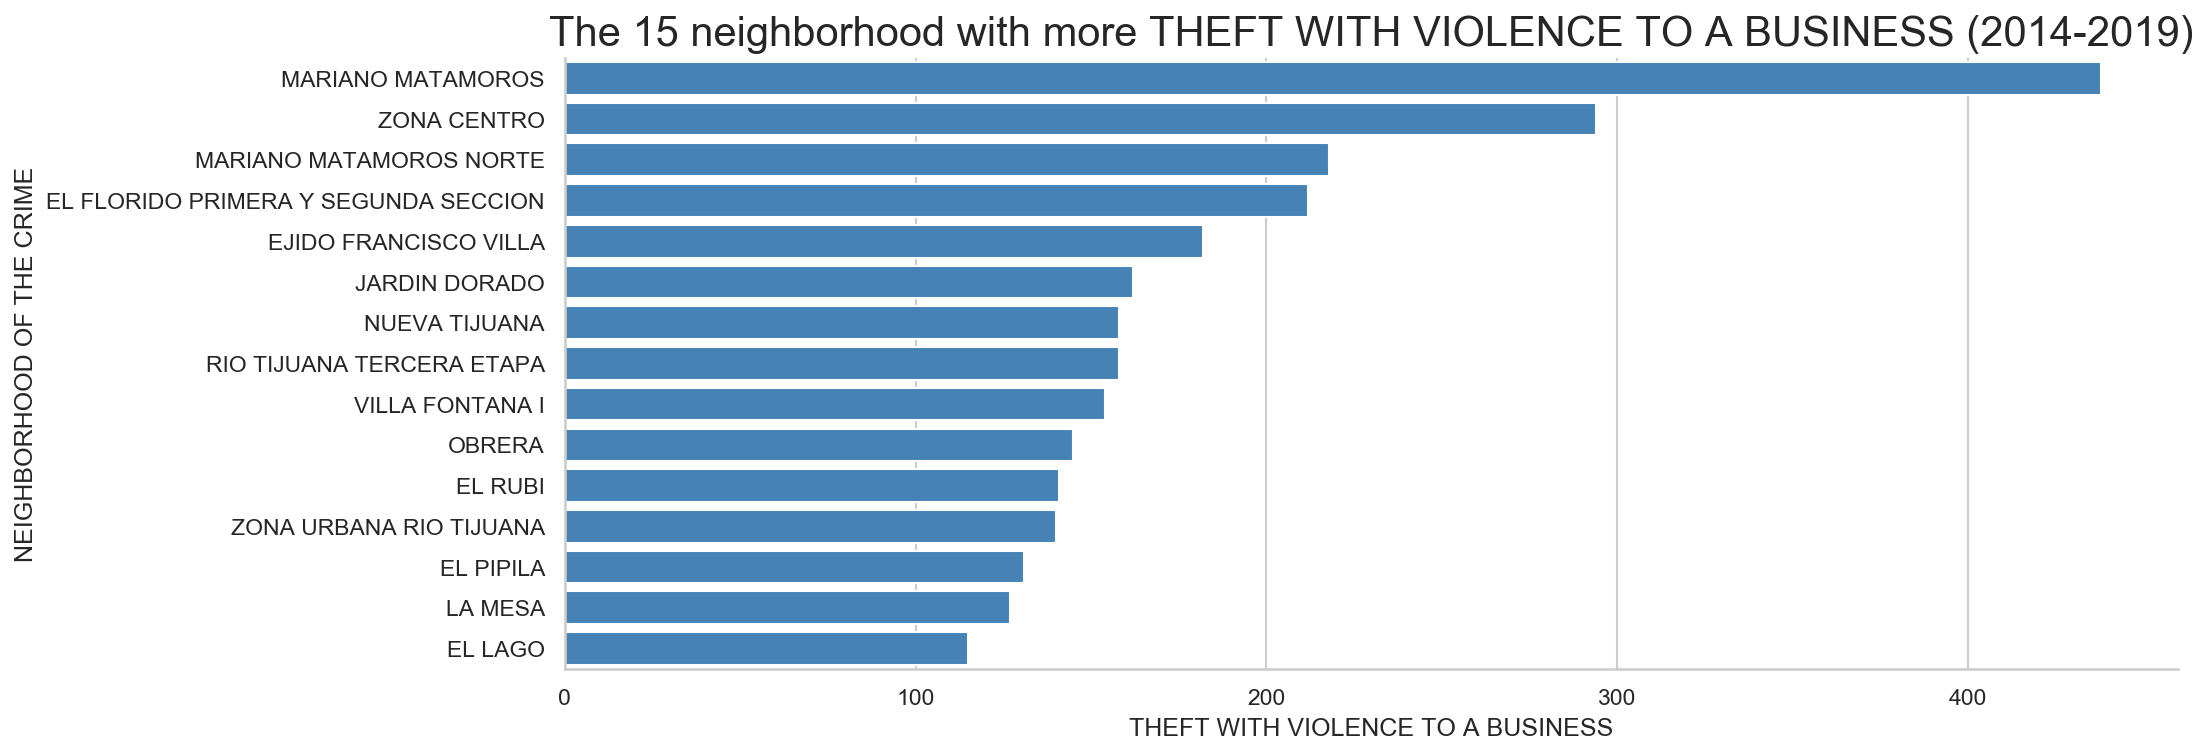

In [48]:
# create a count plot for all crime scene locations
g = sns.catplot(x='THEFT WITH VIOLENCE TO A BUSINESS',
                   y='NEIGHBORHOOD OF THE CRIME',
                   data=crime_NEIGHBORHOOD_Business ,
                   kind='bar',
                   height=10,
                   orient = 'h',
                   color='steelblue', 
                   saturation=10)
g.fig.set_size_inches(18,5)
#g.set_xticklabels(rotation=90)
plt.title("The 15 neighborhood with more THEFT WITH VIOLENCE TO A BUSINESS (2014-2019)", fontsize=20)
plt.subplots_adjust(top=0.88)
plt.savefig('BUSINESS_THEFT_neighborhood.pdf', dpi=500 ,bbox_inches='tight')

# Histogram of all the crime

In [49]:
pathCrime = 'https://raw.githubusercontent.com/victor-onofre/Capstone-Project/master/Crime%20data/ENGLISH_Clean_crime_tijuana_from_2014_to_2019.csv'

In [51]:
df = pd.read_csv(pathCrime)

In [52]:
df.head()

,CRIME CLASSIFICATION,NEIGHBORHOOD OF THE CRIME,DATE OF RECORD OF THE CRIME,TIME OF THE CRIME,MUNICIPIO,DATE OF THE CRIME,day_of_week,year,month,day,Hour
0,VEHICLE THEFT,VILLA DEL REAL III,01/01/19,19:00,TIJUANA,2018-12-31,Monday,2018,12,31,19.0
1,RESIDENTIAL BURGLARY,LOMAS DE LA AMISTAD,01/01/19,02:00,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
2,THEFT WITH VIOLENCE(IN PUBLIC AREAS),3 DE OCTUBRE,01/01/19,02:39,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
3,VEHICLE THEFT,EMPERADORES,01/01/19,02:00,TIJUANA,2019-01-01,Tuesday,2019,1,1,2.0
4,UNLAWFUL WOUNDING,RESIDENCIAL DEL BOSQUE,01/01/19,23:21,TIJUANA,2018-12-31,Monday,2018,12,31,23.0


In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 136082 entries, 0 to 136081
Data columns (total 11 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   CRIME CLASSIFICATION         136082 non-null  object 
 1   NEIGHBORHOOD OF THE CRIME    136082 non-null  object 
 2   DATE OF RECORD OF THE CRIME  136082 non-null  object 
 3   TIME OF THE CRIME            136082 non-null  object 
 4   MUNICIPIO                    136082 non-null  object 
 5   DATE OF THE CRIME            136082 non-null  object 
 6   day_of_week                  136082 non-null  object 
 7   year                         136082 non-null  int64  
 8   month                        136082 non-null  int64  
 9   day                          136082 non-null  int64  
 10  Hour                         136082 non-null  float64
dtypes: float64(1), int64(3), object(7)
memory usage: 11.4+ MB


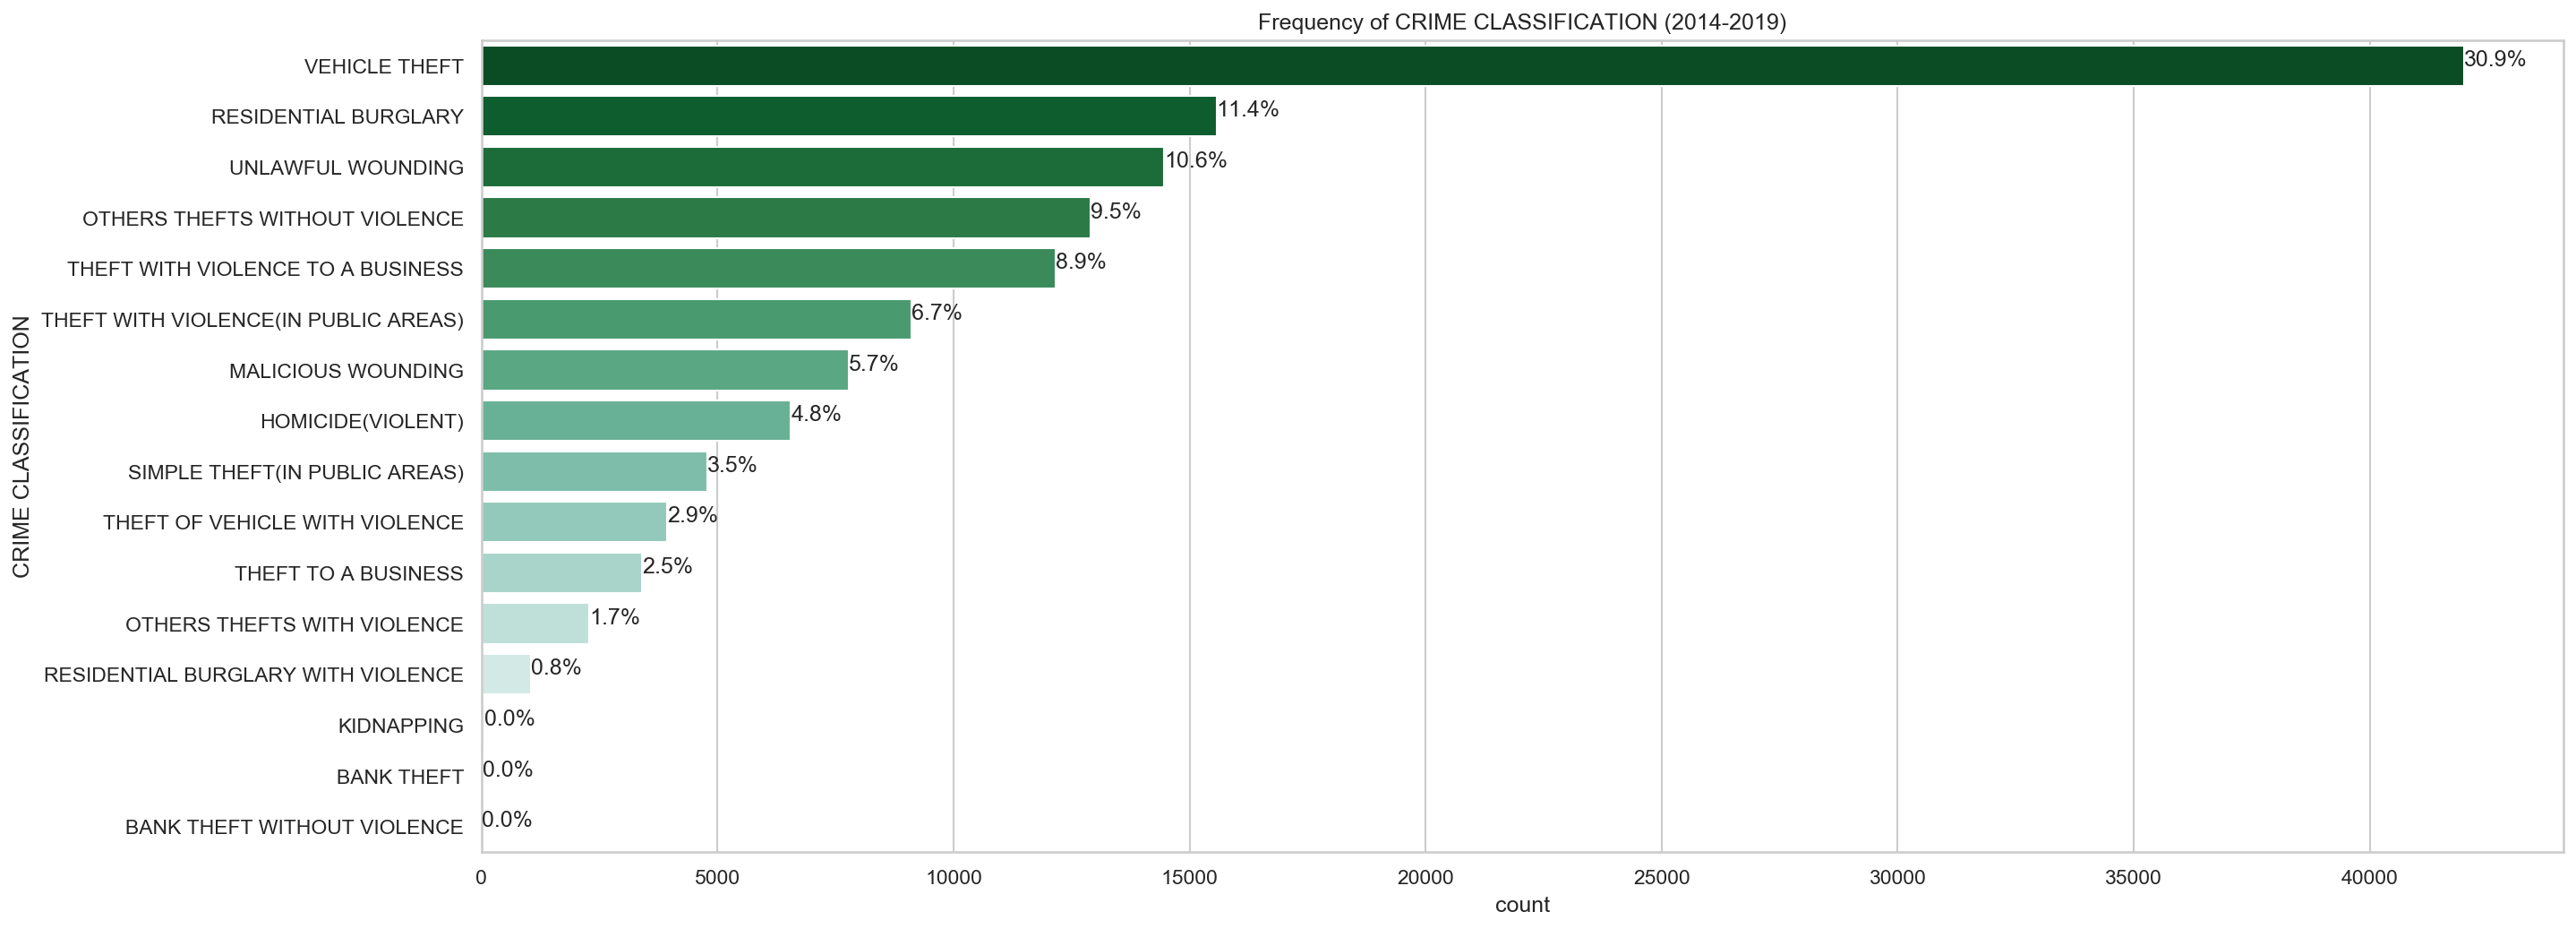

In [54]:
plt.figure(figsize=(20,8)) 
sns.set(style="whitegrid")
ax = sns.countplot(data=df,y='CRIME CLASSIFICATION', order =df['CRIME CLASSIFICATION'].value_counts().index , palette='BuGn_r')
#ax.set_ylabel('totalCount')

plt.title('Frequency of CRIME CLASSIFICATION (2014-2019)')
ncount = len(df)

total = len(df['CRIME CLASSIFICATION'])
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))


plt.savefig('Crime_classification.pdf', dpi=500, bbox_inches='tight')
plt.show()